# PC 9 : Résolution numérique d'EDP paraboliques

**<big> Préparation avant la PC :</big>**
**Les question 1 des exercices 1 et 2 sont à préparer** avant la séance de PC.

**<big><font color=black><span style="background-color:deepskyblue">Bonus</span></font> après la PC :</big>** 

**Les exercices 1 et 2 contiennent des questions d'implémentation (en bleu) qui peuvent être rendues pour obtenir un <font color=black><span style="background-color:deepskyblue">bonus</span></font> sur la note finale**.

In [87]:
# Ce package permet de travailler efficacement avec des tableaux
import numpy as np

# Ce package permet de travailler avec des matrices creuses
import scipy.sparse as sparse
# On pourra utiliser la décomposition LU pour les matrices creuses
from scipy.sparse.linalg import spsolve
# On pourra utiliser la fonction norme
from numpy.linalg import norm

# Ce package permet de faire des sorties graphiques
from matplotlib import pyplot as plt

## Exercice 1 : Équation de la chaleur

>Soient $\nu>0$ un coefficient de diffusion, un intervalle $\Omega=]0,L[$, $L>0$, et $u^0\in C^0(\Omega)$ une donnée initiale. On considère l'équation de la chaleur :
>
>$$ \left\{ \begin{aligned}
      &\displaystyle\frac{\partial u}{\partial t}(t,x) - \nu\frac{\partial^2 u}{\partial x^2}(t,x) = 0, \quad &\forall (t,x) \in\mathbb{R}_+^*\times\Omega, \\ 
      &\frac{\partial u}{\partial x}(t,0) = 0 = \frac{\partial u}{\partial x}(t,L) \quad &\forall t\in\mathbb{R}_+^*, \\ 
      &u(x,0) = u^0(x), \quad &\forall x\in\Omega.
    \end{aligned}
    \right. \qquad{} (1) $$
>
>  On admettra les résultats suivants concernant l'EDP (1) et on essaiera de démontrer leurs équivalents discrets :
>- L'équation de la chaleur (1) admet une unique solution.
>- **Principe du maximum :**
>
>$$  \forall~0\leq s<t<\infty,\ \forall x\in\Omega, \quad{} \min_{y\in\Omega} u(s,y) \leq u(t,x) \leq \max_{y\in\Omega} u(s,y).  $$
>
>- **Conservation de la masse :**
>
>  $$ \forall~0\leq t<\infty, \quad{} \int_\Omega u(t,x) dx = \int_\Omega u^0(x) dx.  $$
>
>- **Décroissance de l'énergie :**
>
>  $$ \forall~0\leq s<t<\infty, \quad{} \int_\Omega \vert u(t,x)\vert^2 dx \leq \int_\Omega \vert u(s,x)\vert^2 dx. $$
>
> Afin d'étudier numériquement l'équation de la chaleur (1), on va considérer différentes méthodes numériques et étudier leurs propriétés.
>- Pour la discrétisation en temps, on fixe un temps final $T>0$, puis on considère 
>
> $$ N\in\mathbb{N}^*, \qquad{} \Delta t = \frac{T}{N} \quad{} \text{et} \quad{} t^n = n\Delta t,\ n = 0, \dots, N. $$
>
>- Pour la discrétisation en espace, on considère
>
> $$ J\in\mathbb{N}^*, \qquad{} \Delta x = \frac{L}{J} \quad{} \text{et}\quad{} x_j = j\Delta x,\ j = -1, \dots, J+1. $$
>
>- On note 
>
> $$ U^0_j = u^0(x_j),\quad{} j = 0, \dots, J, $$
>
>  et on va chercher à construire de manière itérative une suite $U^n = \left(U^n_j\right)_{0\leq j \leq J}$ telle que $U^n_j$ approche $u(t^n,x_j)$.
>
>Pour les questions d'implémentation, dans cet exercice on prendra 
>
> $$  \nu = 1,\quad{} L=10,\quad{} J=100, \quad{} u^0(x) = 2 - \cos \frac{2\pi x}{L},  $$
>
>et différentes valeurs de $T$ et de $\Delta t$ données plus loin.

### Question 1 : Solution théorique

Vérifier que la solution de (1) avec la condition initiale donnée ci-dessus est

$$ u(t,x) = 2 - e^{-\nu\frac{4\pi^2}{L^2}t}\cos\left(\frac{2\pi x}{L}\right). $$

### Question 2 : Schéma "différences finies" explicite en temps

>On considère le schéma donné par
>
> $$ \frac{U^{n+1}_j - U^n_j}{\Delta t} - \nu \frac{U^n_{j-1}-2U^n_j+U^n_{j+1}}{(\Delta x)^2} = 0 \qquad{} \forall~n\geq 0,\quad{} \forall~0 \leq j\leq J.\qquad{} (2) $$
>
>Pour $j=0$ (resp. $j=J$), ce schéma fait apparaitre $U^n_{-1}$ (resp. $U^n_{J+1}$). Ces deux quantités seront determinées par les conditions bords. En discrétisant les conditions de Neumann de manière décentrée ou centrée, on obtient
>
> $$ \frac{U_0^n - U^n_{-1}}{\Delta x} = 0 \quad{}\text{et}\quad{} \frac{U^n_{J+1} - U^n_{J}}{\Delta x} = 0, \qquad{}(3a) $$
>
>ou
>
> $$ \frac{U_1^n - U^n_{-1}}{2\Delta x} = 0 \quad{}\text{et}\quad{} \frac{U^n_{J+1} - U^n_{J-1}}{2\Delta x} = 0. \qquad{} (3b) $$
>
>Les avantages et inconvénients de chacunes de ces deux discrétisations seront étudiés à travers les différentes questions.

$1$. **Réécriture matricielle du schéma :**

Donner les matrices $A^{expl}_1$ et $A^{expl}_2$ de taille $(J+1) \times (J+1)$ permettant d'écrire le schéma (2) sous la forme $U^{n+1}=A^{expl}_1 U^n$ pour la convention (3a) et $U^{n+1}=A^{expl}_2 U^n$ pour la convention (3b). 

*Indication : On pourra faire apparaitre le nombre sans dimension $\alpha = \frac{\nu \Delta t}{\Delta x^2}$.*

$2$. **Propriétés numériques :**

$a$. **Consistance** 

>On définit l'erreur locale de troncature $\varepsilon^n=\left(\varepsilon_j^n\right)_{0\leq j\leq J}$ du schéma (2) par 
>
> $$ \varepsilon_j^n = \frac{u(t^{n+1},x_j) - u(t^n,x_j)}{\Delta t} - \nu \frac{u(t^n,x_{j-1}) - 2u(t^n,x_j) + u(t^n,x_{j+1})}{(\Delta x)^2}, $$
>
>pour tout $1\le j \le J-1$ et
>
>$$\begin{aligned}
  \varepsilon_0^n   &= \frac{u(t^{n+1},x_0   ) - u(t^n,x_0   )}{\Delta t} - \nu \frac{-2u(t^n,x_0)+2u(t^n,x_{1})}{(\Delta x)^2}, \\
  \varepsilon_{J}^n &= \frac{u(t^{n+1},x_{J}) - u(t^n,x_{J})}{\Delta t} - \nu \frac{2u(t^n,x_{J-1})-2u(t^n,x_{J})}{(\Delta x)^2},
\end{aligned}$$ 
>  
>lorsqu'on considère les conditions de bord (3b). 
>On dit que le schéma est d'ordre $p$ en temps et $q$ en espace s'il existe $C\in\mathbb{R}^+$ telle que $\max\limits_{j,n} |\varepsilon_j^n| \le C (\Delta t^p + \Delta x^q)$.

Montrer que le schéma (2) avec les conditions de bord (3b) est consistant. 

$b$. Donner son ordre. *On pourra supposer la solution aussi régulière que nécessaire.* 
  
$c$. **Stabilité en norme $\ell_{\Delta x}^2$** 

>On dit que le schéma (2) muni des conditions de bord (3a) ou  (3b) est stable pour la norme $\| . \|$ s'il existe $C\in\mathbb{R}^+$ indépendante de $\Delta x$ et de $\Delta t$ (mais pouvant dépendre de $T$) telle que, pour toute donnée initiale $U^0$,
>
> $$ \|U^n\| \le C(T) \|U^0\| \quad{}\forall~n\ge 0. $$
>
>On définit la norme $\ell^2_{\Delta x}$ de $U^n$ par
>
> $$\begin{aligned} \left\Vert U^n \right\Vert_{\ell^2_{\Delta x}} := \sqrt{\Delta x \sum_{j=0}^{J+1} \left(U^n_j\right)^2} = \sqrt{\Delta x} \left\Vert U^n \right\Vert_{2}.\end{aligned}$$
>
>**Remarque :** si $U^n_j$ approche bien $u(t^n,x_j)$, alors cette norme approche la norme $L^2$ de la fonction $x\mapsto u(t^n,x)$, quand $\Delta x\to 0$.

Donner une condition nécessaire sur $\alpha$ pour que le schéma (2-3a) soit stable en norme $\ell^2_{\Delta x}$.

*Indication : on pourra étudier le spectre de $A_1^{expl}$ à l'aide du théorème de Gerschgorin .*

On supposera dans la suite que le schéma (2-3b) est également stable pour cette norme.

$d$. **Convergence en norme $\ell_{\Delta x}^2$** 

>Un schéma est dit convergent en norme $\| . \|$ si 
>
>$$ \lim\limits_{\Delta t, \Delta x \rightarrow 0}\sup\limits_{t^n \le T} \|e^n\| \rightarrow 0 $$
>
>où $e^n$ est le vecteur d'erreur donnée par $e_j^n = U_j^n - u(t^n,x_j)$, $j=0,\ldots,J$.

Montrer la convergence en norme $\ell_{\Delta x}^2$ du schéma (2-3b) sous la condition stabilité trouvée à la question précédente.

*Indication : de manière analogue à ce qu'on a fait pour les EDO, on pourra réécire $\left(u(t^{n+1},x_j)\right)_{0\leq j \leq J}$ en fonction de $\left(u(t^n,x_j)\right)_{0\leq j \leq J}$, $A^{expl}$, et $\varepsilon^n$.* 

$3$. **Propriétés physiques :**

$a$. **Principe du maximum discret :** Montrer, sous la condition de stabilité sur $\alpha$ trouvée au 2.b, que le schéma (2) vérifie

$$\begin{aligned} \forall~n\geq 0,\ \forall~0\leq j\leq J, \quad{} \min_i U^n_i \leq U^{n+1}_j \leq \max_i U^n_i, \end{aligned}$$  

que ce soit pour le choix (3a) ou (3b) de discrétisation au bord. 

>**Remarque :** On vient de montrer que le schéma est aussi stable pour le norme infinie.

$b$. **Conservation de la masse :** Étudier, en fonction du choix entre (3a) et (3b), si le schéma préserve ou non la masse, c'est à dire si

$$\begin{aligned} \forall~n\geq 0, \quad{} \sum_{j=0}^{J} U^{n+1}_j \Delta x = \sum_{j=0}^{J} U^{n}_j \Delta x. \end{aligned}$$  

*Indication : on pourra considérer le vecteur $e = \begin{pmatrix} 1 \\ \vdots \\ 1 \end{pmatrix} \in \mathbb{R}^{J+1}$ et remarquer que la masse s'écrit $e^T\, U^n\Delta x$.*

>**Remarque : Décroissance de l'énergie.** La condition de stabilité $\ell_{\Delta x}^2$ de la question précédente mène à l'inégalité $\|U^{n+1}\|_{\ell_{\Delta x}^2} \le \|U^n\|_{\ell_{\Delta x}^2}$ qui est la version discrète de la décroissance de l'énergie donnée en rappel pour la solution continue.   

$4$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>**  **Implémentation :** On rappelle les paramètres numériques :

$$  \Delta x = \frac{L}{J}, \quad{} N \Delta t = T, \quad{} \alpha = \frac{\nu \Delta t}{\Delta x^2} $$

et l'on fixera 

$$ \nu = 1, \quad{} L=10,\quad{} J=100, \quad{} u^0(x) = 2 - \cos \frac{2\pi x}{L},  $$

$a$. Implémenter les schémas (2-3a) et (2-3b). 

**On définira les schémas numériques à partir des matrices $A_{expl}$ calculées au $1$., que l'on implémentera en format creux. On utilisera pour cela la fonction *sparse.diags* de scipy. De même, on utilisera la fonction *A.dot* pour les produits matrice-vecteur (il est adapté au format creux).**

$b$. Pour chaque schéma, utiliser $\Delta t= 0.004$ et afficher la solution obtenue pour $T=5$, ainsi que la donnée initiale et la solution théorique au temps $T$.

$c$. Sur un autre graphique, afficher la masse $\sum_{j=0}^{J} U^{n}_j\Delta x $ en fonction de $n$ pour les deux schémas. Sur un autre graphique, afficher l'énergie $\left\Vert U^n \right\Vert_{\ell_{\Delta x}^2}$ en fonction de $n$  pour les deux schémas. 

$d$. Pour chaque schéma, utiliser ensuite $\Delta t= 0.0051$ et afficher à nouveau la solution obtenue pour $T=5.1$ (tel que $T=N\Delta t$ avec $N$ entier), ainsi que la donnée initiale et la solution théorique au temps $T$. Calculer $\alpha=\frac{\nu \Delta t}{\Delta x^2}$ pour les deux pas de temps utilisés, et commenter les différents résultats obtenus.

In [88]:
def A_explicite1(alpha, J):
    """
    Calcule la matrice A_{expl} correspondant au schéma (2-3a) en format sparse
    ----------   
    parametres:
    alpha : valeur de alpha = nu*dt/dx**2
    J     : nombre de points de discrétisation (A_{expl} est de taille J+1xJ+1)
    
    valeurs de retour:
    A     : matrice A_{expl} correspondant au schéma (2-3a) en format sparse
    """
    main_diag = (1- 2*alpha)*np.ones(J + 1)
    main_diag[0] += alpha
    main_diag[-1] += alpha

    offset_diag = alpha*np.ones(J)

    return sparse.diags([offset_diag, main_diag, offset_diag], offsets=(-1, 0, 1))

def A_explicite2(alpha, J):
    """
    Calcule la matrice A_{expl} correspondant au schéma (2-3b) en format sparse
    ----------   
    parametres:
    alpha : valeur de alpha = nu*dt/dx**2
    J     : nombre de points de discrétisation (A_{expl} est de taille J+1xJ+1)
    
    valeurs de retour:
    A     : matrice A_{expl} correspondant au schéma (2-3b) en format sparse
    """
    main_diag = (1 - 2*alpha)*np.ones(J + 1)

    offset_diag = alpha*np.ones(J)
    offset_diag[0] += alpha

    return sparse.diags([offset_diag[::-1], main_diag, offset_diag], offsets=(-1, 0, 1))

In [89]:
def schema_explicite_chaleur(U0, A, N, dx):
    """
    Calcule itérativement les U_i^n obtenus avec le schéma (2-3a) ou (2-3b) 
    ----------   
    parametres:
    U_0 : vecteur contenant les valeurs de U au temps 0
    A   : matrice A_{expl} correspondant au schéma (2-3a) ou (2-3b)
    N   : nombre de pas de temps (N * dt = T)
    dx  : pas d'espace
    
    valeurs de retour:
    U       : vecteur des U_i^n au temps final t^n = T = N * dt 
    masse   : vecteur contenant la masse (sum U_j^n dx) à tous les temps n
    energie : vecteur contenant la masse (||U^n||_l2dx) à tous les temps n
    """
    U = np.zeros((N + 1, U0.size))
    U[0, :] = U0
    for i in range(N):
        U[i + 1, :] = A@U[i, :]
    mass = (np.sum(U[:, 1:-1], axis=1) + 0.5*(U[:, 0] + U[:, -1]))*dx
    energy = (np.sum(U[:, 1:-1]**2, axis=1) + 0.5*(U[:, 0]**2 + U[:, -1]**2))*dx
    return U, mass, energy

In [90]:
def u0_1(x, L=10):
    #définition de la 1e condition initiale
    return 2 - np.cos(2*np.pi*x/L)

def u_th(t, x, nu=1, L=10):
    #définition de la solution théorique
    return 2 - np.exp(-nu*4*np.pi**2/L**2*t)*np.cos(2*np.pi*x/L)

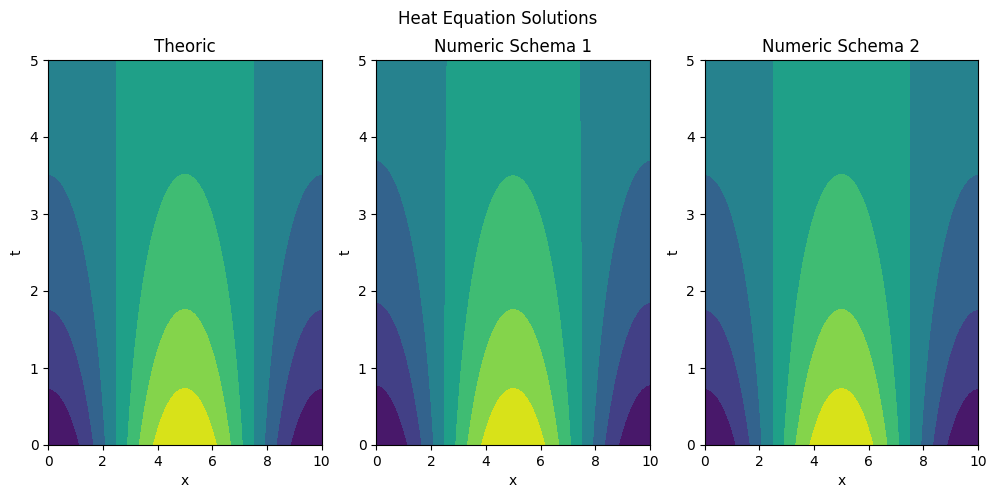

alpha = 0.400


In [91]:
# Tracer les solutions numériques obtenues avec les différents schémas
# Comparer à la solution exacte

nu = 1
L = 10
J = 100

T = 5
dt = 0.004
N = round(T/dt)

dx = L/J
time_line = np.linspace(0, T, N + 1)
x_line = np.linspace(0, L, J + 1)
U0 = u0_1(x_line, L)

alpha = nu*dt/(dx**2)
A1 = A_explicite1(alpha, J)
A2 = A_explicite2(alpha, J)

sol1_U, sol1_mass, sol1_energy = schema_explicite_chaleur(U0, A1, N, dx)
sol2_U, sol2_mass, sol2_energy = schema_explicite_chaleur(U0, A2, N, dx)

x_mesh, t_mesh = np.meshgrid(x_line, time_line)
u_mesh = u_th(t_mesh, x_mesh, nu, L)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

fig.suptitle(f"Heat Equation Solutions")

axs[0].set_title("Theoric")
axs[0].contourf(x_mesh, t_mesh, u_mesh)
axs[0].set_xlabel("x")
axs[0].set_ylabel("t")

axs[1].set_title("Numeric Schema 1")
axs[1].contourf(x_mesh, t_mesh, sol1_U)
axs[1].set_xlabel("x")
axs[1].set_ylabel("t")

axs[2].set_title("Numeric Schema 2")
axs[2].contourf(x_mesh, t_mesh, sol2_U)
axs[2].set_xlabel("x")
axs[2].set_ylabel("t")

plt.show()

print(f"alpha = {alpha:.3f}")

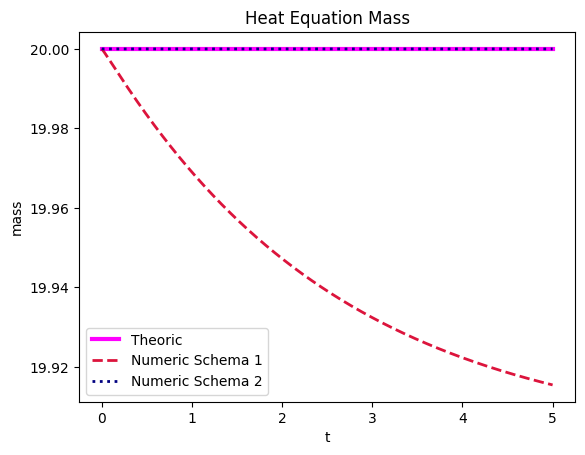

In [92]:
# Tracer la masse des solutions numériques obtenues avec les différents schémas en fonction du temps
 
mass_theoric = 2*L

plt.title("Heat Equation Mass")
plt.plot([0, T], [mass_theoric, mass_theoric], color='fuchsia', label='Theoric', linewidth=3)
plt.plot(time_line, sol1_mass, color='crimson', label='Numeric Schema 1', linewidth=2, linestyle='--')
plt.plot(time_line, sol2_mass, color='navy', label='Numeric Schema 2', linewidth=2, linestyle=':')
plt.xlabel("t")
plt.ylabel("mass")
plt.legend()
plt.show()

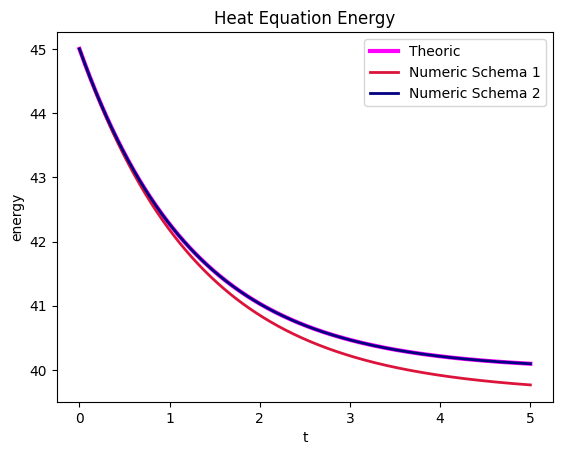

In [93]:
# Tracer l'énergie des solutions numériques obtenues avec les différents schémas en fonction du temps
energy_theoric = L*(4 + 0.5*np.exp(-2*nu*(2*np.pi/L)**2*time_line))

plt.title("Heat Equation Energy")
plt.plot(time_line, energy_theoric, color='fuchsia', label='Theoric', linewidth=3)
plt.plot(time_line, sol1_energy, color='crimson', label='Numeric Schema 1', linewidth=2)
plt.plot(time_line, sol2_energy, color='navy', label='Numeric Schema 2', linewidth=2)
plt.xlabel("t")
plt.ylabel("energy")
plt.legend()
plt.show()

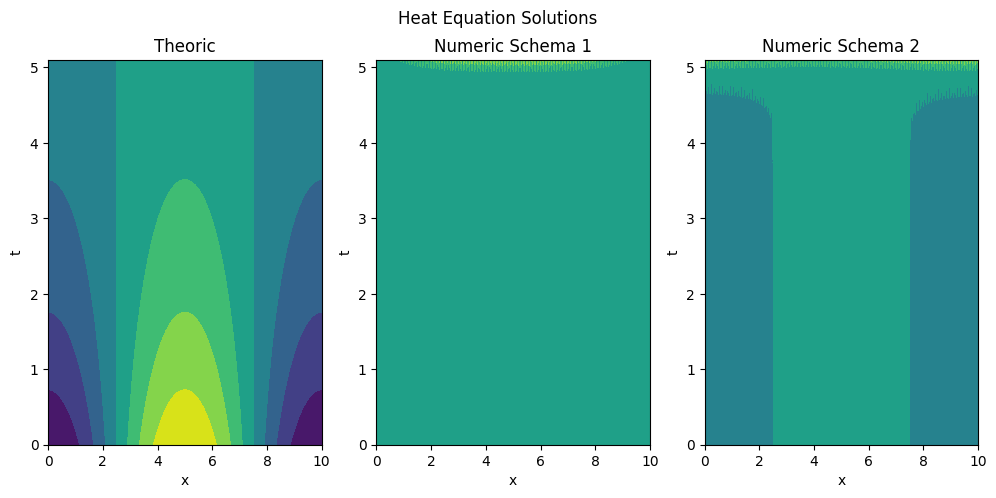

alpha = 0.510


In [94]:
# Tracer les solutions numériques obtenues avec les différents schémas avec les nouveaux paramètres
nu = 1
L = 10
J = 100

T = 5.1
dt = 0.0051
N = round(T/dt)

dx = L/J
time_line = np.linspace(0, T, N + 1)
x_line = np.linspace(0, L, J + 1)
U0 = u0_1(x_line, L)

alpha = nu*dt/(dx**2)
A1 = A_explicite1(alpha, J)
A2 = A_explicite2(alpha, J)

sol1_U, sol1_mass, sol1_energy = schema_explicite_chaleur(U0, A1, N, dx)
sol2_U, sol2_mass, sol2_energy = schema_explicite_chaleur(U0, A2, N, dx)

x_mesh, t_mesh = np.meshgrid(x_line, time_line)
u_mesh = u_th(t_mesh, x_mesh, nu, L)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

fig.suptitle(f"Heat Equation Solutions")

axs[0].set_title("Theoric")
axs[0].contourf(x_mesh, t_mesh, u_mesh)
axs[0].set_xlabel("x")
axs[0].set_ylabel("t")

axs[1].set_title("Numeric Schema 1")
axs[1].contourf(x_mesh, t_mesh, sol1_U)
axs[1].set_xlabel("x")
axs[1].set_ylabel("t")

axs[2].set_title("Numeric Schema 2")
axs[2].contourf(x_mesh, t_mesh, sol2_U)
axs[2].set_xlabel("x")
axs[2].set_ylabel("t")

plt.show()

print(f"alpha = {alpha:.3f}")


**Réponse :**

La condition de stabilité est $\alpha \leq \frac{1}{2}$. Dans, le premier cas $\alpha = 0.4$ et il a bien trouvé une solution approximée. Par contre, dans le seconde cas, $\alpha=0.51$ et la solution trouvée ne correspond pas du tout à la vrai solution. On a alors, les résultats attendus d'après la theorie de stabilité.

### Question 3 : Schéma "différences finies" implicite en temps

>On considère le schéma donné par
>
>$$ \frac{U^{n+1}_j - U^n_j}{\Delta t} - \nu \frac{U^{n+1}_{j-1}-2U^{n+1}_j+U^{n+1}_{j+1}}{(\Delta x)^2} = 0 \qquad{} \forall~n\geq 1,\quad{} \forall~ 0\leq j\leq J+1. \qquad{} (4) $$
>
>Afin d'approcher les conditions aux bords, on utilisera à nouveau les équations (3a) ou (3b) en remplaçant $n$ par $n+1$.

$1$. Donner les matrices $A^{impl}_1$ et $A^{impl}_2$ de taille $(J+1)\times(J+1)$ permettant d'écrire ce schéma sous la forme $A^{impl}_1 U^{n+1}=U^n$ pour la convention (3a) et $A^{impl}_2 U^{n+1}= U^n$ pour la convention (3b). Montrer que ces deux matrices sont inversibles. *Faire à nouveau apparaitre le nombre sans dimension $\alpha = \frac{\nu \Delta t}{\Delta x^2}$.*

$2$. **Propriétés numériques :**

>**Remarque :** On peut montrer comme dans la partie précédente que le schéma est consistant (remplacer les $n$ par des $n+1$ dans la définition de l'erreur de troncature) avec les mêmes ordres. 

**Stabilité en norme $\ell_{\Delta x}^2$ :** Montrer que le schéma (4) muni des conditions de bord (3a) est inconditionnellement stable en norme $\ell_{\Delta x}^2$. 

>**Remarque :** On peut ensuite montrer comme dans la partie précédente que le schéma est convergent.

$3$. **Propriétés Physiques :**

$a$. **Principe du maximum discret :** Soient $i\in{1,2}$ et $X,Y\in\mathbb{R}^{J+1}$ tels que $A^{impl}_i X = Y$. Montrer que si $Y\geq 0$ (au sens où $Y_j\geq 0$ pour tout $j$), alors $X\geq 0$. En déduire que, sans condition sur $\alpha$, le schéma vérifie

$$ \forall~n\geq 0,\ \forall~0\leq j\leq J, \quad{} \min_i U^n_i \leq U^{n+1}_j \leq \max_i U^n_i. $$

*Indication : on pourra montrer que $U^{n+1}-\left(\min_{i} U^n_i\right) e \geq 0$ et $\left(\max_{i}U^n_i\right) e -U^{n+1} \geq 0$, où $e\in\mathbb{R}^{J+1}$ est défini comme à la question 1.c).*

$b$. **Conservation de la masse :** Étudier, en fonction du choix entre (3a) et (3b), si le schéma préserve ou pas la masse, c'est à dire si

$$ \forall n\geq 0, \quad{} \sum_{j=0}^{J} U^{n+1}_j \Delta x = \sum_{j=0}^{J} U^{n}_j\Delta x. $$

*On pourra à nouveau considérer le vecteur $e\in \mathbb{R}^{J+1}$ et remarquer que la masse s'écrit $e^T\, U^n \Delta x$.*

$4$.  **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>**  **Implémentation :**

$a$. Implémenter les schémas (4-3a) et (4-3b). 

**Comme au point précédent, on définira les schémas numériques à partir des matrices $A_{impl}$ calculées au 1), que l'on implémentera en format creux. On utilisera pour cela la fonction *sparse.diags* de scipy. Pour la résolution d'un problème linéaire *AU=b*, on utilsera *splu*, la décomposition LU adaptée au format creux, et sa résolution *A.solve()*. *Il est bien entendu recommandé de lire la documentation de ces fonctions.***

$b$. Pour chaque schéma, utiliser $\Delta t= 0.1$ et afficher la solution obtenue pour $T=5$, ainsi que la donnée initiale et la solution théorique au temps $T$. 

$c$. Sur un autre graphique, afficher la masse $\sum_{j=0}^{J} U^{n}_j\Delta x $ en fonction de $n$ pour les deux schémas. Sur un autre graphique, afficher l'énergie $\left\Vert U^n \right\Vert_{\ell_{\Delta x}^2}$ en fonction de $n$  pour les deux schémas. 

$d$. Commenter les différents résultats obtenus et discuter des avantages et des inconvénients des schémas explicites et implicites pour ce problème.

In [95]:
def A_implicite1(alpha,J):
    """
    Calcule la matrice A_{impl} correspondant au schéma (4-3a) en format sparse
    ----------   
    parametres:
    alpha : valeur de alpha = nu*dt/dx**2
    J     : nombre de points de discrétisation (A_{impl} est de taille J+1xJ+1)
    
    valeurs de retour:
    A     : matrice A_{impl} correspondant au schéma (4-3a) en format sparse
    """
    main_diag = (1 + 2*alpha)*np.ones(J + 1)
    main_diag[0] -= alpha
    main_diag[-1] -= alpha

    offset_diag = -alpha*np.ones(J)

    return sparse.diags([offset_diag, main_diag, offset_diag], offsets=(-1, 0, 1), format='csc')

def A_implicite2(alpha,J):    
    """
    Calcule la matrice A_{impl} correspondant au schéma (4-3b) en format sparse
    ----------   
    parametres:
    alpha : valeur de alpha = nu*dt/dx**2
    J     : nombre de points de discrétisation (A_{impl} est de taille J+1xJ+1)
    
    valeurs de retour:
    A     : matrice A_{impl} correspondant au schéma (4-3b) en format sparse
    """
    main_diag = (1 + 2*alpha)*np.ones(J + 1)

    offset_diag = -alpha*np.ones(J)
    offset_diag[0] -= alpha

    return sparse.diags([offset_diag[::-1], main_diag, offset_diag], offsets=(-1, 0, 1), format='csc')

In [96]:
# Cellule de test pour vérifier les valeurs de ces matrices
alpha = 0.3
J = 4

A1 = A_implicite1(alpha, J)
A2 = A_implicite2(alpha, J)


print(f"A1:\n{A1.toarray()}")
print(f"A2:\n{A2.toarray()}")

A1:
[[ 1.3 -0.3  0.   0.   0. ]
 [-0.3  1.6 -0.3  0.   0. ]
 [ 0.  -0.3  1.6 -0.3  0. ]
 [ 0.   0.  -0.3  1.6 -0.3]
 [ 0.   0.   0.  -0.3  1.3]]
A2:
[[ 1.6 -0.6  0.   0.   0. ]
 [-0.3  1.6 -0.3  0.   0. ]
 [ 0.  -0.3  1.6 -0.3  0. ]
 [ 0.   0.  -0.3  1.6 -0.3]
 [ 0.   0.   0.  -0.6  1.6]]


In [97]:
def schema_implicite_chaleur(U0, A, N, dx):
    """
    Calcule itérativement les U_i^n obtenus avec le schéma (4-3a) ou (4-3b) 
    ----------   
    parametres:
    U_0 : vecteur contenant les valeurs de U au temps 0
    A   : matrice A_{impl} correspondant au schéma (4-3a) ou (4-3b)
    N   : nombre de pas de temps (N * dt = T)
    dx  : pas d'espace
    
    valeurs de retour:
    U       : vecteur des U_i^n au temps final t^n = T = N * dt 
    masse   : vecteur contenant la masse (sum U_j^n dx) à tous les temps n
    energie : vecteur contenant la masse (||U^n||_l2dx) à tous les temps n
    """
    U = np.zeros((N + 1, U0.size))

    U[0, :] = U0
    for i in range(N):
        U[i + 1, :] = spsolve(A, U[i, :])
    mass = (np.sum(U[:, 1:-1], axis=1) + 0.5*(U[:, 0] + U[:, -1]))*dx
    energy = (np.sum(U[:, 1:-1]**2, axis=1) + 0.5*(U[:, 0]**2 + U[:, -1]**2))*dx
    return U, mass, energy

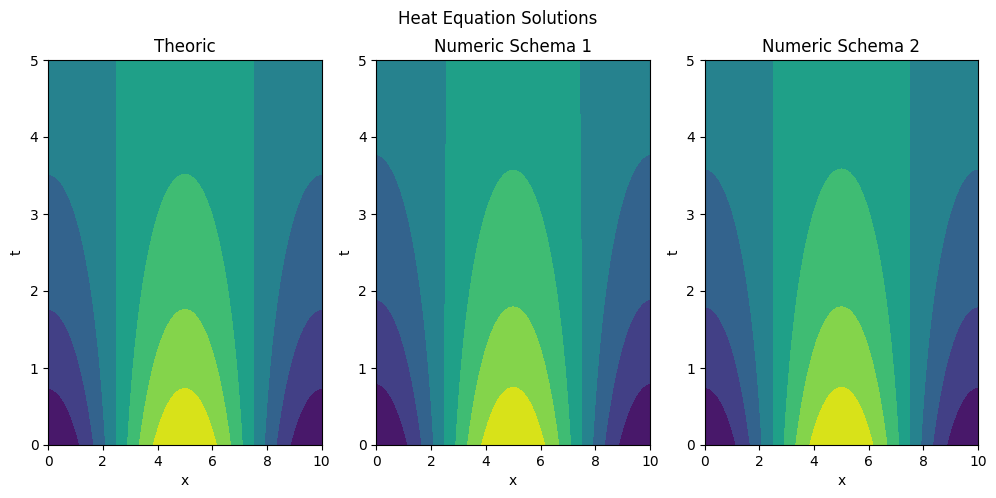

alpha = 10.000


In [98]:
# Tracer les solutions numériques obtenues avec les différents schémas
# Comparer à la solution exacte

nu = 1
L = 10
J = 100

T = 5
dt = 0.1
N = round(T/dt)

dx = L/J
time_line = np.linspace(0, T, N + 1)
x_line = np.linspace(0, L, J + 1)
U0 = u0_1(x_line, L)

alpha = nu*dt/(dx**2)
A1 = A_implicite1(alpha, J)
A2 = A_implicite2(alpha, J)

sol1_U, sol1_mass, sol1_energy = schema_implicite_chaleur(U0, A1, N, dx)
sol2_U, sol2_mass, sol2_energy = schema_implicite_chaleur(U0, A2, N, dx)

x_mesh, t_mesh = np.meshgrid(x_line, time_line)
u_mesh = u_th(t_mesh, x_mesh, nu, L)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

fig.suptitle(f"Heat Equation Solutions")

axs[0].set_title("Theoric")
axs[0].contourf(x_mesh, t_mesh, u_mesh)
axs[0].set_xlabel("x")
axs[0].set_ylabel("t")

axs[1].set_title("Numeric Schema 1")
axs[1].contourf(x_mesh, t_mesh, sol1_U)
axs[1].set_xlabel("x")
axs[1].set_ylabel("t")

axs[2].set_title("Numeric Schema 2")
axs[2].contourf(x_mesh, t_mesh, sol2_U)
axs[2].set_xlabel("x")
axs[2].set_ylabel("t")

plt.show()

print(f"alpha = {alpha:.3f}")

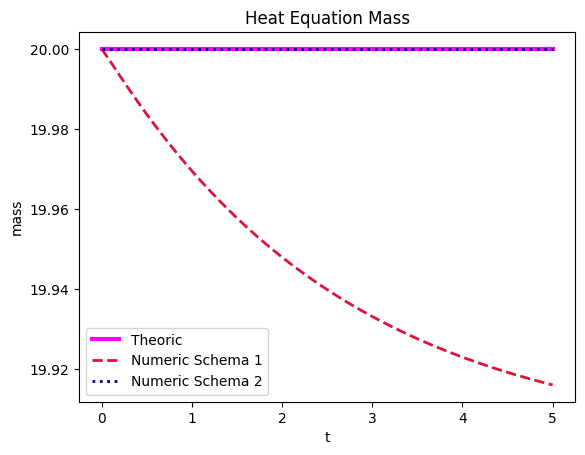

In [99]:
# Tracer la masse des solutions numériques obtenues avec les différents schémas en fonction du temps
mass_theoric = 2*L

plt.title("Heat Equation Mass")
plt.plot([0, T], [mass_theoric, mass_theoric], color='fuchsia', label='Theoric', linewidth=3)
plt.plot(time_line, sol1_mass, color='crimson', label='Numeric Schema 1', linewidth=2, linestyle='--')
plt.plot(time_line, sol2_mass, color='navy', label='Numeric Schema 2', linewidth=2, linestyle=':')
plt.xlabel("t")
plt.ylabel("mass")
plt.legend()
plt.show()

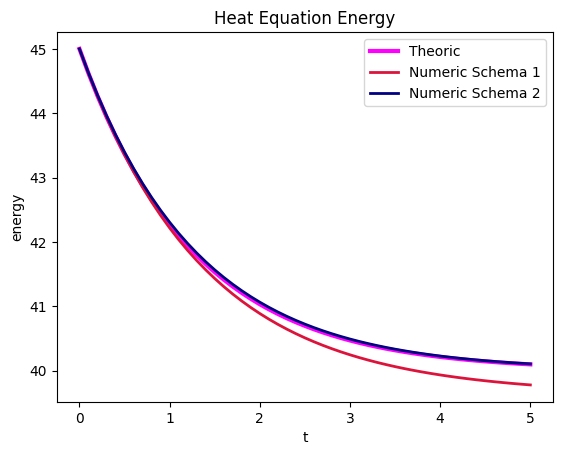

In [100]:
# Tracer l'énergie des solutions numériques obtenues avec les différents schémas en fonction du temps
energy_theoric = L*(4 + 0.5*np.exp(-2*nu*(2*np.pi/L)**2*time_line))

plt.title("Heat Equation Energy")
plt.plot(time_line, energy_theoric, color='fuchsia', label='Theoric', linewidth=3)
plt.plot(time_line, sol1_energy, color='crimson', label='Numeric Schema 1', linewidth=2)
plt.plot(time_line, sol2_energy, color='navy', label='Numeric Schema 2', linewidth=2)
plt.xlabel("t")
plt.ylabel("energy")
plt.legend()
plt.show()


**Réponse :**

Dans le schème implicite, on voit que c'est beaucoup plus stable. On a trouvé des bons résultats même pour $\alpha=10$. Par contre, il peut être plus couteux, car il faut résoudre un système linéaire à chaque itération.

## Exercice 2  : Étude d'une onde progressive
  
> On se donne toujours $\nu>0$ un coefficient de diffusion, et $u^0\in C^0(\mathbb{R})$ une donnée initiale, et on considère désormais une équation de réaction-diffusion de la forme :
>
> $$ 
  \left\{
  \begin{aligned}
  &\displaystyle\frac{\partial u}{\partial t}(t,x)-\nu\frac{\partial^2 u}{\partial x^2}(t,x) = g(u(t,x)), \quad &\forall (t,x) \in\mathbb{R}_+^*\times\mathbb{R}, \\  
  &u(x,0) = u^0(x), \quad &\forall x\in\mathbb{R},
  \end{aligned}
  \right. \qquad{} (5)
$$
>
>où $g:\mathbb{R}\to\mathbb{R}$ est donnée par
>
>$$ g(u) = ku^2(1-u). \qquad{} (6) $$
>
>Cette équation, parfois appelée équation de Nagumo, permet de décrire des phénomènes de propagation. En effet, pour certaines conditions initiales, on peut montrer que la solution se rapproche d'une *onde progressive*, c'est à dire d'une solution de la forme
>
> $$ u(t,x) = \beta(x-ct) \qquad{} (7a) $$
>
>où
>
>$$ c= \sqrt{\frac{k\nu}{2}},\qquad{} \beta(\xi) = \frac{e^{-c(\xi-\xi_0)}}{1+e^{-c(\xi-\xi_0)}}, \qquad{} (7b)$$
>
>et $\xi_0\in\mathbb{R}$ dépend de la donnée initiale.
>
>
>On va essayer d'observer numériquement ce phénomène, à l'aide de différents schémas. Pour ce faire, on se place en domaine borné, et on considère donc à nouveau $\Omega=]0,L[$ (dans la pratique on prendra $L\gg 1$), et l'équation
>
>$$  \left\{
  \begin{aligned}
  &\displaystyle\frac{\partial u}{\partial t}(t,x)-\nu\frac{\partial^2 u}{\partial x^2}(t,x) = g(u(t,x)), \quad &\forall~(t,x) \in\mathbb{R}_+^*\times\Omega,  \\ 
  &\frac{\partial u}{\partial x}(t,0) = 0 = \frac{\partial u}{\partial x}(t,L )\quad &\forall~t\in\mathbb{R}_+^*, \\ 
  &u(x,0) = u^0(x), \quad &\forall x\in\Omega,
  \end{aligned}
  \right. \qquad{} (8)
$$
>
>toujours avec $g$ donnée par (6). Pour les simulations, on prendra dans cet exercice
>
>$$ \nu=0.1,\quad{} L=100,\quad{} k=10,\quad{} \text{et}\quad{} u^0(x) =
\left\{
\begin{aligned}
& 1,\quad & x\leq \frac{L}{10} \\
& 0,\quad & x >\frac{L}{10}.
\end{aligned}
\right.$$
>
>On utilisera les mêmes types de discrétisations spatiales et temporelles que dans l'exercice précédent, avec $J=1000$ ($\Delta x = \frac{L}{J}$), et différentes valeurs de $T$ et de $\Delta t$ données plus loin.

### Question 1 : Solution théorique

Vérifiez que l'onde progressive $u$ définie en (7) est bien solution de l'équation de Nagumo (6) sur $\mathbb{R}$, avec $u^0(x) = \beta(x)$.

### Question 2 : Schéma totalement explicite

>On considère le schéma donné par
>
>$$ \frac{U^{n+1}_j - U^n_j}{\Delta t} - \nu \frac{U^n_{j-1}-2U^n_j+U^n_{j+1}}{(\Delta x)^2} = g(U^n_j) \qquad{} \forall~n\geq 1,\ \forall~ 0\leq j\leq J, $$
>
>avec les conventions (3b), qu'on peut réécrire
>
>$$ U^{n+1} = A^{expl}_2 U^n + \Delta t\, g(U^n), \qquad{} (9) $$
>
>avec les notations de l'Exercice 1, $g(U^n)$ désignant le vecteur $\left(g(U^n_j)\right)_{0\leq j\leq J}$.

$a$.  **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>**  Implémenter ce schéma et afficher les solutions obtenues à $T=0$, $T=20$, $T=40$ et $T=60$, avec $\Delta t = 0.025$ (sur un même graphique, avec différentes couleurs). 

$b$.  **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>**  Répeter ces expériences avec $\Delta t =0.045$. Commenter les résultats obtenus (calculer dans les deux cas $\alpha = \frac{\nu\Delta t}{\Delta x^2}$).

In [101]:
def g(x, k):
    # definition de la fonction g
    # x : position
    # k : paramètre d'amplitude du terme source
    return k * x**2 * (1-x)

def u0_2(x, L):
    # definition de la condition initiale
    # x  : position
    # L : taille du domaine
    return 1. * (x <= L/10)

def u_th_2(x, t, k, nu, L):
    c = np.sqrt(0.5*nu*k)
    return u0_2(x - c*t, L)

In [102]:
def schema_explicite_reaction_diffusion(U0, A, N, g, k, dt):  
    """
    Calcule itérativement les U_i^n obtenus avec le schéma (9) 
    ----------   
    parametres:
    U_0 : vecteur contenant les valeurs de U au temps 0
    A   : matrice A_{expl} correspondant au schéma (9)
    N   : nombre de pas de temps (N * dt = T)
    g   : fonction du terme source
    k   : parametre d'amplitude du terme source 
    dt  : pas de temps
    
    valeurs de retour:
    U   : vecteur des U_i^n au temps final t^n = T = N * dt 
    """
    U = np.zeros((N + 1, U0.size))

    U[0, :] = U0
    for i in range(N):
        U[i + 1, :] = A@U[i, :] + dt*g(U[i, :], k)
    return U

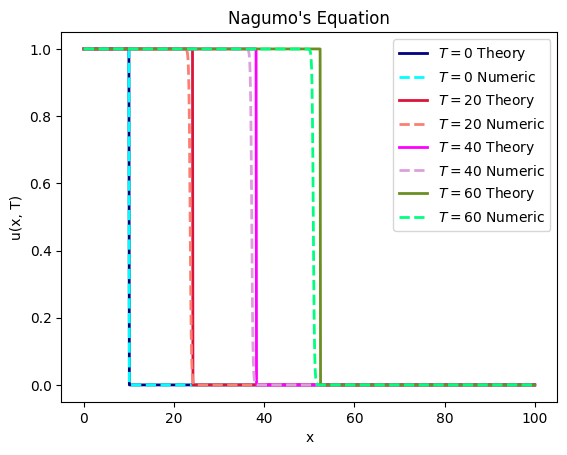

alpha = 0.250


In [103]:
# Tracer la solution numérique obtenue aux différents temps


nu = 0.1
L = 100
k = 10
J = 1000

T = 60
dt = 0.025
N = round(T/dt)

dx = L/J
time_line = np.linspace(0, T, N + 1)
x_line = np.linspace(0, L, J + 1)
U0 = u0_2(x_line, L)

alpha = nu*dt/(dx**2)

A = A_explicite2(alpha, J)

sol_U = schema_explicite_reaction_diffusion(U0, A, N, g, k, dt)



ts = [0, 20, 40, 60]
colors_theory = ["navy", "crimson", "fuchsia", "olivedrab"]
colors_numeric = ["aqua", "salmon", "plum", "springgreen"]

for t, color_theory, color_numeric in zip(ts, colors_theory, colors_numeric):
    plt.plot(x_line, u_th_2(x_line, t, k, nu, L), label=f'$T={t}$ Theory', color=color_theory, linewidth=2)
    plt.plot(x_line, sol_U[round(t/dt), :], label=f'$T={t}$ Numeric', color=color_numeric, linestyle='--', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x, T)')
plt.title("Nagumo's Equation")
plt.show()

print(f"alpha = {alpha:.3f}")

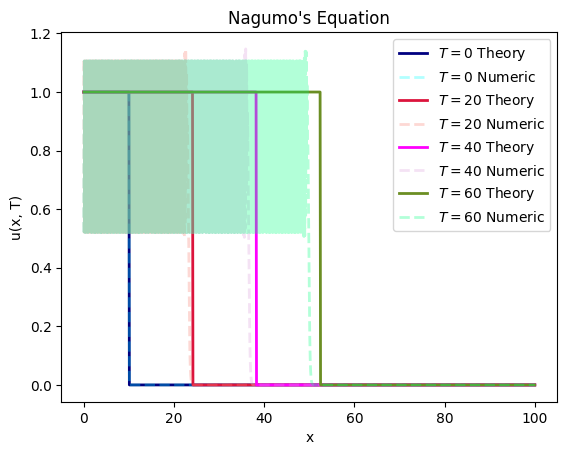

alpha = 0.450


In [104]:
# Tracer la solution numérique obtenue aux différents temps avec le nouveau pas de temps

nu = 0.1
L = 100
k = 10
J = 1000

T = 60
dt = 0.045
N = round(T/dt)

dx = L/J
time_line = np.linspace(0, T, N + 1)
x_line = np.linspace(0, L, J + 1)
U0 = u0_2(x_line, L)

alpha = nu*dt/(dx**2)

A = A_explicite2(alpha, J)

sol_U = schema_explicite_reaction_diffusion(U0, A, N, g, k, dt)

ts = [0, 20, 40, 60]
colors_theory = ["navy", "crimson", "fuchsia", "olivedrab"]
colors_numeric = ["aqua", "salmon", "plum", "springgreen"]

for t, color_theory, color_numeric in zip(ts, colors_theory, colors_numeric):
    plt.plot(x_line, u_th_2(x_line, t, k, nu, L), label=f'$T={t}$ Theory', color=color_theory, linewidth=2)
    plt.plot(x_line, sol_U[round(t/dt), :], label=f'$T={t}$ Numeric', color=color_numeric, linestyle='--', linewidth=2, alpha=0.3)
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x, T)')
plt.title("Nagumo's Equation")
plt.show()

print(f"alpha = {alpha:.3f}")

**Réponse :**

### Question 3 : Schéma semi-implicite :

>On considère le schéma donné par
>
>$$ \frac{U^{n+1}_j - U^n_j}{\Delta t} - \nu \frac{U^{n+1}_{j-1}-2U^{n+1}_j+U^{n+1}_{j+1}}{(\Delta x)^2} = g(U^n_j) \qquad{} \forall~n\geq 1,\ \forall~ 0\leq j\leq J+1, $$
>
>avec les conventions (3b), qu'on peut réécrire
>
>$$ A^{impl}_2 U^{n+1} = U^n + \Delta t\, g(U^n). \qquad{} (10) $$

$a$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>**  Implémenter ce schéma et afficher les solutions obtenues à $T=0$, $T=20$, $T=40$ et $T=60$, avec $\Delta t = 0.045$ (sur un même graphique, avec différentes couleurs).

$b$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>**  Répeter ces expériences avec $\Delta t = 0.4$. Commenter.

In [105]:
def schema_semi_implicite_reaction_diffusion(U0, A, N, g, k, dt):   
    """
    Calcule itérativement les U_i^n obtenus avec le schéma (10) 
    ----------   
    parametres:
    U_0 : vecteur contenant les valeurs de U au temps 0
    A   : matrice A_{impl} correspondant au schéma (10)
    N   : nombre de pas de temps (N * dt = T)
    g   : fonction du terme source
    k   : parametre d'amplitude du terme source 
    dt  : pas de temps
    
    valeurs de retour:
    U   : vecteur des U_i^n au temps final t^n = T = N * dt 
    """
    U = np.zeros((N + 1, U0.size))

    U[0, :] = U0
    for i in range(N):
        U[i + 1, :] = spsolve(A, U[i, :] + dt*g(U[i, :], k))
    return U

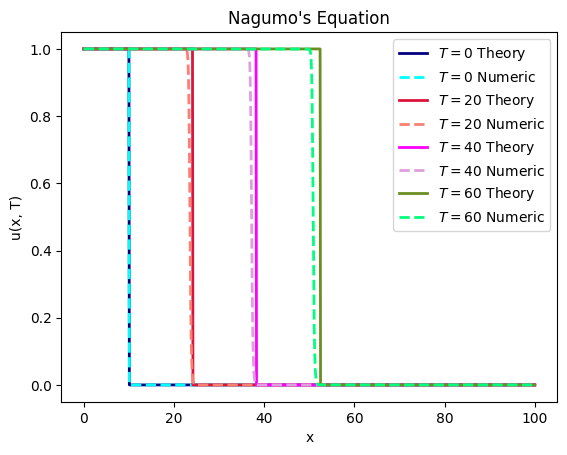

alpha = 0.450


In [106]:
# Tracer la solution numérique obtenue aux différents temps
nu = 0.1
L = 100
k = 10
J = 1000

T = 60
dt = 0.045
N = round(T/dt)

dx = L/J
time_line = np.linspace(0, T, N + 1)
x_line = np.linspace(0, L, J + 1)
U0 = u0_2(x_line, L)

alpha = nu*dt/(dx**2)

A = A_implicite2(alpha, J)

sol_U = schema_semi_implicite_reaction_diffusion(U0, A, N, g, k, dt)

ts = [0, 20, 40, 60]
colors_theory = ["navy", "crimson", "fuchsia", "olivedrab"]
colors_numeric = ["aqua", "salmon", "plum", "springgreen"]

for t, color_theory, color_numeric in zip(ts, colors_theory, colors_numeric):
    plt.plot(x_line, u_th_2(x_line, t, k, nu, L), label=f'$T={t}$ Theory', color=color_theory, linewidth=2)
    plt.plot(x_line, sol_U[round(t/dt), :], label=f'$T={t}$ Numeric', color=color_numeric, linestyle='--', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x, T)')
plt.title("Nagumo's Equation")
plt.show()

print(f"alpha = {alpha:.3f}")

C:\Users\ericg\AppData\Local\Temp\ipykernel_20628\366193550.py:5: RuntimeWarning: overflow encountered in multiply
  return k * x**2 * (1-x)
C:\Users\ericg\AppData\Local\Temp\ipykernel_20628\271834189.py:20: RuntimeWarning: invalid value encountered in add
  U[i + 1, :] = spsolve(A, U[i, :] + dt*g(U[i, :], k))


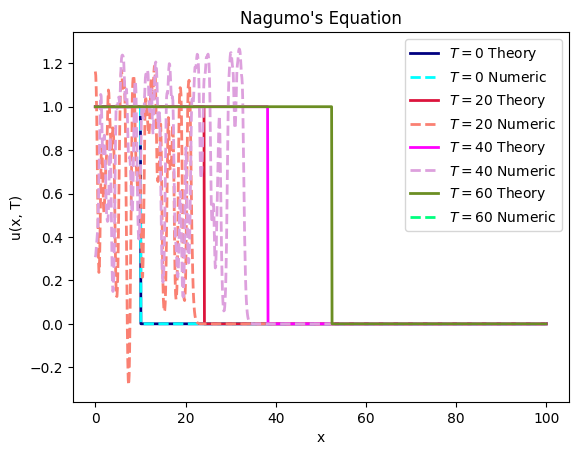

alpha = 4.000


In [107]:
# Tracer la solution numérique obtenue aux différents temps avec le nouveau pas de temps
nu = 0.1
L = 100
k = 10
J = 1000

T = 60
dt = 0.40
N = round(T/dt)

dx = L/J
time_line = np.linspace(0, T, N + 1)
x_line = np.linspace(0, L, J + 1)
U0 = u0_2(x_line, L)

alpha = nu*dt/(dx**2)

A = A_implicite2(alpha, J)

sol_U = schema_semi_implicite_reaction_diffusion(U0, A, N, g, k, dt)
ts = [0, 20, 40, 60]
colors_theory = ["navy", "crimson", "fuchsia", "olivedrab"]
colors_numeric = ["aqua", "salmon", "plum", "springgreen"]

for t, color_theory, color_numeric in zip(ts, colors_theory, colors_numeric):
    plt.plot(x_line, u_th_2(x_line, t, k, nu, L), label=f'$T={t}$ Theory', color=color_theory, linewidth=2)
    plt.plot(x_line, sol_U[round(t/dt), :], label=f'$T={t}$ Numeric', color=color_numeric, linestyle='--', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x, T)')
plt.title("Nagumo's Equation")
plt.show()

print(f"alpha = {alpha:.3f}")

**Réponse :**

Cette schème est plus stable que l'anterieur, parce que dans ce cas, il y a eu de convérgence lorsque $\alpha = 4.5$. Ce qui n'est pas arrivé avec la méthode explicite. Mais, lorsque $\alpha=4$, le schèma n'a pas bien convergé. En fait, on a eu aussi un _overflow_ pour $T=60$. C'est pour ça qu'il n'est pas affiché dans le graphe.

### Question 4 : Schéma totalement implicite :

>On considère le schéma donné par
>
>$$ \frac{U^{n+1}_j - U^n_j}{\Delta t} - \nu \frac{U^{n+1}_{j-1}-2U^{n+1}_j+U^{n+1}_{j+1}}{(\Delta x)^2} = g(U^{n+1}_j) \qquad{} \forall~n\geq 1,\ \forall~0\leq j\leq J, $$
>
>avec les conventions (3b), qu'on peut réécrire
>
>$$ A^{impl}_2 U^{n+1} = U^n + \Delta t\, g(U^{n+1}). \qquad{}(11) $$
>
>Étant donné $U^n$, on doit donc résoudre un système non-linéaire pour trouver $U^{n+1}$. On peut reformuler ce problème en disant qu'on cherche un zéro de la fonction $F^n : \mathbb{R}^{J+1}\to\mathbb{R}^{J+1}$ définie par
>
>$$ F^n (V) = A^{impl}_2 V - \Delta t\, g(V) - U^n. $$
>
>On rappelle qu'on peut utiliser la méthode de Newton pour trouver un zéro approché :
>
>$$ \left\{\begin{aligned}
&V_0 = U^n \\
&V_{k+1} = V_k - \left(DF^n(V_k)\right)^{-1} F^n (V_k).
\end{aligned}\right. $$
>
>Une fois que la méthode de Newton a convergé, on peut prendre pour $U^{n+1}$ le dernier itéré $V_k$ obtenu.

$a$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>**  Implémenter ce schéma et afficher les solutions obtenues à $T=0$, $T=20$, $T=40$ et $T=60$, avec $\Delta t = 0.4$ (sur un même graphique, avec différentes couleurs).

**On exploitera à nouveau le stockage creux, et notamment la fonction *spsolve* pour la résolution d'un problème linéaire creux (dans l'algorithme de Newton).**

$b$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>**  Répéter ces éxpériences avec $\Delta t = 0.045$. Commenter.

In [138]:
def dg(x,k):
    # dérivée du terme source
    return k*x*(2-3*x)

def schema_implicite_reaction_diffusion(U, A, N, g, dg, k, dt, itmax=20, tol=1.e-10):
    """
    Calcule itérativement les U_i^n obtenus avec le schéma (11) 
    ----------   
    parametres:
    U_0 : vecteur contenant les valeurs de U au temps 0
    A   : matrice A_{impl} correspondant au schéma (11)
    N   : nombre de pas de temps (N * dt = T)
    g   : fonction du terme source
    dg  : dérivée de la fonction du terme source
    k   : parametre d'amplitude du terme source 
    dt  : pas de temps
    
    valeurs de retour:
    U   : vecteur des U_i^n au temps final t^n = T = N * dt 
    """
    def F(A, V, g, dt, k, Un):
        return A@V - dt*g(V, k) - Un
    
    def DF(A, V, dg, dt, k):
        return A - dt*sparse.diags(dg(V, k))

    U = np.zeros((N + 1, U0.size))

    U[0, :] = U0
    for i in range(N):
        it = 0
        V = U[i, :]
        FV = F(A, V, g, dt, k, U[i, :])
        while norm(FV) > tol and it < itmax:
            V -= sparse.linalg.inv(DF(A, V, dg, dt, k))@FV
            FV = F(A, V, g, dt, k, U[i, :])
            it += 1
        U[i+1, :] = V.copy()
    return U

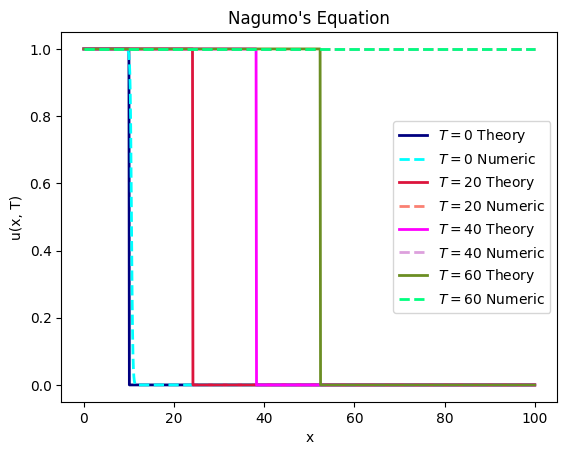

alpha = 0.450


In [139]:
# Tracer la solution numérique obtenue aux différents temps
# Comparer à la solution exacte

nu = 0.1
L = 100
k = 10
J = 1000

T = 60
dt = 0.045
N = round(T/dt)

dx = L/J
time_line = np.linspace(0, T, N + 1)
x_line = np.linspace(0, L, J + 1)
U0 = u0_2(x_line, L)

alpha = nu*dt/(dx**2)

A = A_implicite2(alpha, J)

sol_U = schema_implicite_reaction_diffusion(U0, A, N, g, dg, k, dt)

ts = [0, 20, 40, 60]
colors_theory = ["navy", "crimson", "fuchsia", "olivedrab"]
colors_numeric = ["aqua", "salmon", "plum", "springgreen"]

for t, color_theory, color_numeric in zip(ts, colors_theory, colors_numeric):
    plt.plot(x_line, u_th_2(x_line, t, k, nu, L), label=f'$T={t}$ Theory', color=color_theory, linewidth=2)
    plt.plot(x_line, sol_U[round(t/dt), :], label=f'$T={t}$ Numeric', color=color_numeric, linestyle='--', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x, T)')
plt.title("Nagumo's Equation")
plt.show()

print(f"alpha = {alpha:.3f}")

**Réponse :**

Clairement, la solution n'a pas marché. Je pense que le problème est l'implementation de la méthode de Newton, mais je ne trouve pas le problème. Mon intuition du problème est que cette méthode est plus stable, mais aussi couteuse. Comme la méthode de Newton ne marche pas assez bien, il prendre toujours tous les 20 itérations et est centaines de fois plus lente que les autres.